# Predicción

In [33]:
#Paquetes y Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
pd.set_option('mode.chained_assignment', None)

In [34]:
session = tf.Session()

In [35]:
train = pd.read_csv('../DataSet/TrainMejorado2.csv')
train.iloc[:, 20:21] = train.iloc[:, 20:21].fillna(False)
train.iloc[:, 6:7] = train.iloc[:, 6:7].fillna("Sin Definir")
train.iloc[:, 21:22] = train.iloc[:, 21:22].fillna(0)
train["FECHA"] = pd.to_datetime(train["FECHA"])
train["FECHA"]=train["FECHA"].apply(lambda x: x.toordinal())

In [36]:
#Definir los valores de entrenamiento y de prediccion.
x = train.iloc[:, [1, 5, 6, 8, 10, 14, 15, 19, 20, 21]].values
y = train.iloc[:, 22].values

In [37]:
#Limpiar los datos
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer = imputer.fit(x[:, [0, 1, 3, 4, 5, 6, 7, 9]])
x[:, [0, 1, 3, 4, 5, 6, 7, 9]] = imputer.transform(x[:, [0, 1, 3, 4, 5, 6, 7, 9]])

In [38]:
#Codificar los datos
labelecoder_x = LabelEncoder()
x[:, 8] = labelecoder_x.fit_transform(x[:,8])
onehotencoder = make_column_transformer((OneHotEncoder(sparse=False), [2]), remainder="passthrough")
x = onehotencoder.fit_transform(x)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [40]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Modelo de regresión logística

- $x \in \mathbb R^{54}$
- $A \in \mathbb R_{54\times 1}$
- $b \in \mathbb R$
- $y = Ax+b\in \mathbb R$
- $\hat{y} = sigmoid(y)\in (0,1) $

In [41]:
batch_size = 25
x_data = tf.placeholder(shape=[None, 54], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[54,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
y_pred = tf.add(tf.matmul(x_data, A), b)

In [42]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_pred, labels= y_target))
pred = tf.nn.sigmoid_cross_entropy_with_logits(logits= y_pred, labels=y_target)
init = tf.global_variables_initializer()
session.run(init)
my_optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_step = my_optim.minimize(loss)

In [43]:
classification_lr = tf.round(tf.sigmoid(y_pred))
correct_classification = tf.cast(tf.equal(classification_lr, y_target), tf.float32)
accuracy = tf.reduce_mean(correct_classification)

In [44]:
loss_vec = []
train_acc = []
test_acc = []
prediction = []
for i in range(20000):
    rand_idx = np.random.choice(len(X_train), size=batch_size)
    rand_x = X_train[rand_idx]
    rand_y = np.transpose([y_train[rand_idx]])
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    temp_acc_train = session.run(accuracy, 
                                 feed_dict={x_data: X_train, y_target: np.transpose([y_train])})
    train_acc.append(temp_acc_train)
    temp_acc_test = session.run(accuracy, 
                                feed_dict={x_data: X_test, y_target: np.transpose([y_test])})
    test_acc.append(temp_acc_test)
    
    temp_pred=session.run(classification_lr,feed_dict={x_data: X_train})
    prediction =temp_pred
 
    if(i+1)%1000==0:
        print("Loss: "+str(temp_loss)+ " Acc: "+ str(temp_acc_train)+ " AccTest: "+str(temp_acc_test))

Loss: 0.25642717 Acc: 0.90407616 AccTest: 0.90239143
Loss: 0.061945256 Acc: 0.98181593 AccTest: 0.97559786
Loss: 0.03928939 Acc: 0.99292165 AccTest: 0.99023914
Loss: 0.021443281 Acc: 0.99572855 AccTest: 0.9956076
Loss: 0.020698156 Acc: 0.9963388 AccTest: 0.9965837
Loss: 0.016076839 Acc: 0.99658287 AccTest: 0.9965837
Loss: 0.014473747 Acc: 0.99719304 AccTest: 0.9965837
Loss: 0.010942843 Acc: 0.9975592 AccTest: 0.9975598
Loss: 0.010441496 Acc: 0.9978033 AccTest: 0.9975598
Loss: 0.013930328 Acc: 0.9978033 AccTest: 0.9975598
Loss: 0.009037211 Acc: 0.9979253 AccTest: 0.9975598
Loss: 0.01054109 Acc: 0.9979253 AccTest: 0.9975598
Loss: 0.009633016 Acc: 0.9979253 AccTest: 0.9975598
Loss: 0.006514034 Acc: 0.9979253 AccTest: 0.9975598
Loss: 0.004989596 Acc: 0.9979253 AccTest: 0.9975598
Loss: 0.008056548 Acc: 0.9979253 AccTest: 0.9975598
Loss: 0.008572205 Acc: 0.9979253 AccTest: 0.9975598
Loss: 0.0074750064 Acc: 0.9979253 AccTest: 0.9975598
Loss: 0.0055362834 Acc: 0.99804735 AccTest: 0.9975598
Los

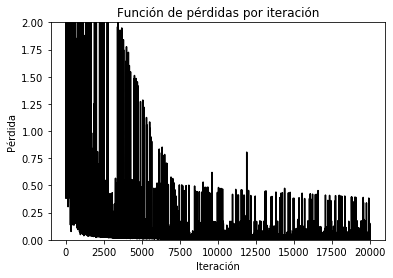

In [45]:
plt.plot(loss_vec, 'k-')
plt.title("Función de pérdidas por iteración")
plt.xlabel("Iteración")
plt.ylabel("Pérdida")
plt.ylim([0,2])
plt.show()

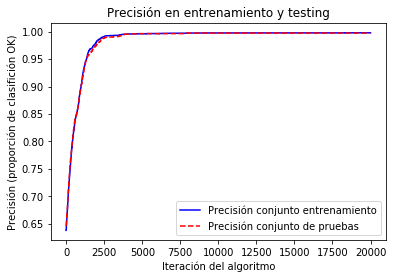

In [46]:
plt.plot(train_acc, 'b-', label = "Precisión conjunto entrenamiento")
plt.plot(test_acc, 'r--', label = "Precisión conjunto de pruebas")
plt.title("Precisión en entrenamiento y testing")
plt.xlabel("Iteración del algoritmo")
plt.ylabel("Precisión (proporción de clasifición OK)")
plt.legend(loc = 'lower right')
plt.show()

In [47]:
X_train = pd.DataFrame(X_train)

In [48]:
X_train[54]= prediction 

In [49]:
Result = pd.DataFrame(prediction)

In [50]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.079139,-0.078355,-0.225050,-0.117186,-0.03316,-0.138399,-0.059597,-0.084432,-0.04137,-0.302273,...,-0.099262,2.615559,0.626957,0.340918,2.357481,-0.539434,0.044254,-0.073476,1.218683,0.0
1,-0.079139,-0.078355,-0.225050,-0.117186,-0.03316,-0.138399,-0.059597,-0.084432,-0.04137,-0.302273,...,0.601625,1.040936,0.232080,0.205953,-0.702889,0.017476,0.044254,-0.073476,0.463823,0.0
2,-0.079139,-0.078355,-0.225050,-0.117186,-0.03316,-0.138399,-0.059597,-0.084432,-0.04137,-0.302273,...,-0.426343,1.565810,0.363706,0.060388,0.553474,-0.286293,0.044254,-0.073476,-0.808907,0.0
3,-0.079139,-0.078355,-0.225050,-0.117186,-0.03316,-0.138399,-0.059597,-0.084432,-0.04137,-0.302273,...,0.601625,-0.087544,-0.050915,-0.039134,-1.765965,0.118732,0.044254,-0.073476,0.779811,0.0
4,-0.079139,-0.078355,-0.225050,-0.117186,-0.03316,-0.138399,-0.059597,-0.084432,-0.04137,-0.302273,...,0.508173,-0.087544,-0.050915,-0.039292,-1.089462,-0.488806,0.044254,-0.073476,-0.633358,0.0
5,-0.079139,-0.078355,-0.225050,-0.117186,-0.03316,-0.138399,-0.059597,-0.084432,-0.04137,-0.302273,...,0.601625,-1.032318,-0.287842,-0.094828,-2.184752,-0.539434,0.044254,-0.073476,-0.308592,0.0
6,-0.079139,-0.078355,-0.225050,-0.117186,-0.03316,-0.138399,-0.059597,-0.084432,-0.04137,-0.302273,...,-0.379617,-0.874855,-0.248354,-0.133434,-0.090815,-0.539434,0.044254,-0.073476,-0.958124,0.0
7,-0.079139,-0.078355,-0.225050,-0.117186,-0.03316,-0.138399,-0.059597,-0.084432,-0.04137,-0.302273,...,0.741803,1.723273,0.403194,0.282850,2.357481,-0.387549,0.044254,-0.073476,-0.729910,0.0
8,-0.079139,-0.078355,-0.225050,-0.117186,-0.03316,-0.138399,-0.059597,-0.084432,-0.04137,-0.302273,...,-0.286166,-0.559931,-0.169379,-0.068247,0.811189,0.118732,0.044254,-0.073476,0.033728,0.0
9,-0.079139,-0.078355,-0.225050,-0.117186,-0.03316,-0.138399,-0.059597,-0.084432,-0.04137,-0.302273,...,0.040915,0.673524,0.139942,0.180321,-0.380745,-0.539434,0.044254,-0.073476,-0.773797,0.0
